# Observations:
1.) The most clear correlation is between latitude and temperature. The curvilinear distribution of cities in the scatter plot shows how increased distance from the equator corresponds with decreases in temperatures. 
2.) Upon closer examination, the latitude-temperature distribution is bow shaped, with temperatures peaking at the equator and declining in both Northern and Southern latitudinal directions. The asymmerty of the distribution is attributed to higher representation of human cities in the extreme Norther latitudes, which was expected as there is more land mass on the Earth in the Northern Hemisphere than in the Southern.
3.) Humidity, Wind Speed, and Cloudiness did not appear to be affected by distance from the equator.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
print(cities)

['butaritari', 'tommot', 'tumannyy', 'rikitea', 'albany', 'nizhneyansk', 'dobrljin', 'bredasdorp', 'port alfred', 'constitucion', 'punta arenas', 'coquimbo', 'sarkand', 'iqaluit', 'doka', 'provideniya', 'hilo', 'bitung', 'mataura', 'hobart', 'san quintin', 'alugan', 'teya', 'kamenskoye', 'arraial do cabo', 'costinesti', 'saint-philippe', 'fairhope', 'sabha', 'denpasar', 'chuy', 'ushuaia', 'atuona', 'thinadhoo', 'busselton', 'new norfolk', 'sulangan', 'ome', 'samarai', 'birao', 'gilbues', 'bethel', 'abha', 'kholodnyy', 'hualmay', 'viedma', 'mahebourg', 'tasiilaq', 'havre-saint-pierre', 'vaini', 'sabla', 'kapaa', 'castro', 'jamestown', 'ilulissat', 'kahului', 'bluff', 'henties bay', 'bengkulu', 'georgetown', 'brae', 'puerto ayora', 'ponta do sol', 'komsomolskiy', 'sentyabrskiy', 'illoqqortoormiut', 'longyearbyen', 'kapuskasing', 'loandjili', 'shingu', 'road town', 'kupang', 'namatanai', 'chivay', 'itupiranga', 'cape town', 'acapulco', 'bonthe', 'lazaro cardenas', 'jaranwala', 'scunthorpe

## Perform API Calls

In [29]:
api_key = api_keys.api_key
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + 
#print(url)

In [47]:
# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude
staged_data = []

for city in cities: 
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response_object = requests.get(url).json()
    try:
            name = city,
            lat = response_object['coord']['lat'],
            temp = response_object['main']['temp'],
            humidity = response_object['main']['humidity'],
            clouds = response_object['clouds']['all'],
            wind = response_object['wind']['speed'],
            id = response_object['id']
            
            #append staged_data
            staged_data.append({
                "City Name": name,
                "Latitude": lat,
                "Temperature": temp,
                "Humidity": humidity,
                "Cloudiness": clouds,
                "Wind Speed": wind
            })
            #Include a print log of each city as it's being processed with the city number and city name.
            print(name, id)
    except: 
        continue
            

#parse out json data to replace '1, 2' placeholders
#add try/except for noncities

('butaritari',) 2110227
('tommot',) 2015179
('rikitea',) 4030556
('albany',) 5106834
('dobrljin',) 3201928
('bredasdorp',) 1015776
('port alfred',) 964432
('constitucion',) 4011743
('punta arenas',) 3874787
('coquimbo',) 3893629
('sarkand',) 1519691
('iqaluit',) 5983720
('doka',) 376332
('provideniya',) 4031574
('hilo',) 5855927
('bitung',) 1648636
('mataura',) 6201424
('hobart',) 2163355
('san quintin',) 1688687
('alugan',) 1731248
('teya',) 3526662
('arraial do cabo',) 3471451
('costinesti',) 680546
('saint-philippe',) 6138908
('fairhope',) 4061234
('sabha',) 2212775
('denpasar',) 1645528
('chuy',) 3443061
('ushuaia',) 3833367
('atuona',) 4020109
('thinadhoo',) 1337610
('busselton',) 2075265
('new norfolk',) 2155415
('sulangan',) 1685422
('ome',) 1854162
('samarai',) 2132606
('birao',) 240210
('gilbues',) 3398931
('bethel',) 5880568
('abha',) 110690
('kholodnyy',) 2124611
('hualmay',) 3939761
('viedma',) 3832899
('mahebourg',) 934322
('tasiilaq',) 3424607
('havre-saint-pierre',) 5972

('nemuro',) 2128975
('rovaniemi',) 638936
('rafsanjan',) 118994
('vanderhoof',) 6173361
('forbes',) 2166368
('botesti',) 684070
('gilgit',) 1178338
('dubai',) 292223
('port-gentil',) 2396518
('kedrovyy',) 1538641
('purgstall',) 2768236
('praia da vitoria',) 3372760
('bubaque',) 2374583
('tsaratanana',) 1055059
('wanlaweyn',) 50672
('denizli',) 317106
('porto novo',) 6322184
('kununurra',) 2068110
('adrar',) 2508813
('guadalupe y calvo',) 4005370
('ipixuna',) 3408424
('souillac',) 3026644
('aden',) 415189
('kibaha',) 158027
('bismarck',) 5688025
('kaeo',) 2189343
('cervo',) 3469169
('ikalamavony',) 1064258
('banavar',) 1277408
('mehriz',) 124274
('east stroudsburg',) 5188075
('atikokan',) 5888001
('ladario',) 2732265
('nikolayevsk-na-amure',) 2122850
('manggar',) 1636426
('deputatskiy',) 2028164
('paralimni',) 734330
('san felipe',) 3872255
('evensk',) 2125693
('cidreira',) 3466165
('jiwani',) 1175712
('vilyuysk',) 2013392
('srednekolymsk',) 2121025
('puerto colombia',) 3671497
('petrop

In [65]:
print(staged_data[:5])

[{'City Name': ('butaritari',), 'Latitude': (3.07,), 'Temperature': (85.45,), 'Humidity': (99,), 'Cloudiness': (24,), 'Wind Speed': (12.03,)}, {'City Name': ('tommot',), 'Latitude': (58.97,), 'Temperature': (-2.3,), 'Humidity': (78,), 'Cloudiness': (64,), 'Wind Speed': (2.3,)}, {'City Name': ('rikitea',), 'Latitude': (-23.12,), 'Temperature': (80.46,), 'Humidity': (96,), 'Cloudiness': (76,), 'Wind Speed': (15.55,)}, {'City Name': ('albany',), 'Latitude': (42.65,), 'Temperature': (37.4,), 'Humidity': (92,), 'Cloudiness': (90,), 'Wind Speed': (3.36,)}, {'City Name': ('dobrljin',), 'Latitude': (45.15,), 'Temperature': (30.2,), 'Humidity': (100,), 'Cloudiness': (56,), 'Wind Speed': (3.36,)}]


In [48]:
response_object = requests.get(url)

In [49]:
response_object.json()

{'coord': {'lon': -45.72, 'lat': -1.45},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 79.11,
  'pressure': 1026.17,
  'humidity': 100,
  'temp_min': 79.11,
  'temp_max': 79.11,
  'sea_level': 1026.33,
  'grnd_level': 1026.17},
 'wind': {'speed': 9.57, 'deg': 79.0042},
 'rain': {'3h': 0.625},
 'clouds': {'all': 80},
 'dt': 1546996378,
 'sys': {'message': 0.0034,
  'country': 'BR',
  'sunrise': 1547024633,
  'sunset': 1547068560},
 'id': 3403395,
 'name': 'Candido Mendes',
 'cod': 200}

In [50]:
print(response_object)

<Response [200]>


In [68]:
df = pd.DataFrame(staged_data)
#df.columns = ['City Name', 'Latitude', 'Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

#change datatypes for all columns from object to int
for col in ['City Name', 'Latitude', 'Temperature', 'Humidity', 'Cloudiness', "Wind Speed"]:
    df[col] = df[col].apply(lambda x: x[0])

df.head(20)


,City Name,Cloudiness,Humidity,Latitude,Temperature,Wind Speed
0,butaritari,24,99,3.07,85.45,12.03
1,tommot,64,78,58.97,-2.30,2.30
2,rikitea,76,96,-23.12,80.46,15.55
3,albany,90,92,42.65,37.40,3.36
4,dobrljin,56,100,45.15,30.20,3.36
5,bredasdorp,92,77,-34.53,69.80,8.05
6,port alfred,100,98,-33.59,70.29,5.88
7,constitucion,75,48,23.99,71.60,3.20
8,punta arenas,0,57,-53.16,51.80,17.22
9,coquimbo,0,77,-29.95,62.60,7.34


In [59]:
df['Latitude'].dtype

dtype('int64')

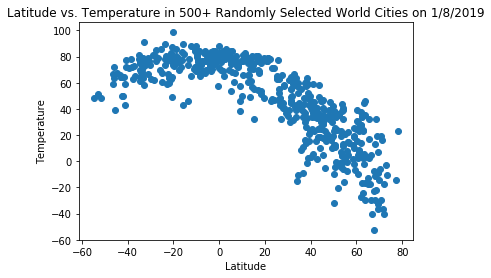

In [78]:
#plot lat vs temp
plt.scatter(df['Latitude'], df['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature in 500+ Randomly Selected World Cities on 1/8/2019')
plt.savefig('latVsTemp.png')

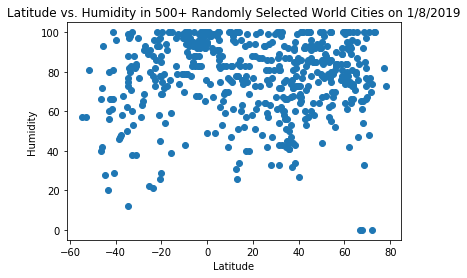

In [79]:
#plot lat vs hum
plt.scatter(df['Latitude'], df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity in 500+ Randomly Selected World Cities on 1/8/2019')
plt.savefig('latVsHumi.png')

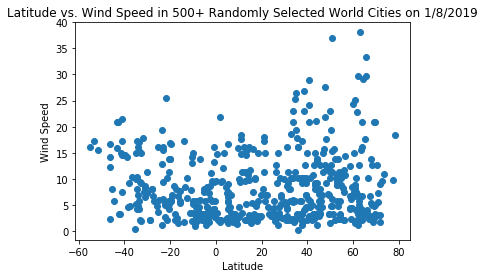

In [80]:
#plot lat vs wind
plt.scatter(df['Latitude'], df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed in 500+ Randomly Selected World Cities on 1/8/2019')
plt.savefig('latVsWinds.png')

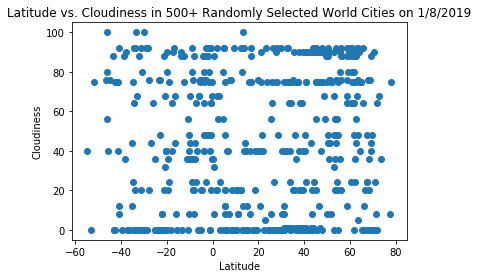

In [81]:
#plot lat vs clouds
plt.scatter(df['Latitude'], df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness in 500+ Randomly Selected World Cities on 1/8/2019')
plt.savefig('latVsClouds.png')

In [82]:
#Save both a CSV of all data retrieved and png images for each scatter plot.
df.to_csv('500_cities.csv')

In [83]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is D212-3EEC

 Directory of C:\Users\BranD\Documents\UDEN201808DATA3\02-Homework\06-Python-APIs\Instructions\starter_code

01/09/2019  01:24 PM    <DIR>          .
01/09/2019  01:24 PM    <DIR>          ..
12/11/2018  01:16 PM    <DIR>          .ipynb_checkpoints
12/11/2018  01:26 PM    <DIR>          __pycache__
01/09/2019  01:24 PM            19,779 500_cities.csv
12/11/2018  01:26 PM                70 api_keys.py
01/09/2019  01:24 PM            22,496 latVsClouds.png
01/09/2019  01:24 PM            23,712 latVsHumi.png
01/09/2019  01:24 PM            24,342 latVsTemp.png
01/09/2019  01:24 PM            24,651 latVsWinds.png
01/09/2019  01:22 PM           155,332 WeatherPy.ipynb
               7 File(s)        270,382 bytes
               4 Dir(s)  891,069,865,984 bytes free
